<a href="https://colab.research.google.com/github/Pesolo/first_ML/blob/main/zin_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
sam = pd.read_csv('SampleSubmission.csv')
var_dec = pd.read_csv('VariableDescription.csv')
var_dec

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [3]:
df = pd.read_csv('train_data.csv')

df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
df.shape

(7160, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [6]:
df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,7
Settlement,0
Building Dimension,106
Building_Type,0


In [7]:
df['Geo_Code'].nunique()

1307

In [8]:
df['Insured_Period'].value_counts()

,count
Insured_Period,
1.000000,5325
0.997268,547
0.000000,165
0.747945,60
0.495890,49
...,...
0.435616,1
0.308743,1
0.437158,1


In [9]:
df['Building_Painted'].value_counts()

,count
Building_Painted,
V,5382
N,1778


In [10]:
df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [11]:
df['Building_Painted'] = np.where(df['Building_Painted'] == 'N', 1, 0)

df['Building_Fenced'] = np.where(df['Building_Fenced'] == 'N', 1, 0)

In [12]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,O,R,680.0,1,1800.0,3,1053,0


In [13]:
df['Building_Painted'].value_counts()

,count
Building_Painted,
0,5382
1,1778


In [14]:
df['Building_Fenced'].value_counts()

,count
Building_Fenced,
1,3608
0,3552


In [15]:
df['NumberOfWindows'].value_counts()

,count
NumberOfWindows,
.,3551
4,939
3,844
5,639
2,363
6,306
7,211
8,116
1,75


In [16]:
df['NumberOfWindows'] = df['NumberOfWindows'].str.strip()

In [17]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace({'.':'', '>=10': '10'})


In [18]:
df['NumberOfWindows'] = df['NumberOfWindows'].astype('int8')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int64  
 5   Building_Fenced     7160 non-null   int64  
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   int8   
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 734.3+ KB


In [20]:
import seaborn as sns

In [21]:
df['Date_of_Occupancy'].median()

1970.0

In [22]:
rural_df = df[df['Settlement']=='R']

In [23]:
rural_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3610 entries, 1 to 7053
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3610 non-null   object 
 1   YearOfObservation   3610 non-null   int64  
 2   Insured_Period      3610 non-null   float64
 3   Residential         3610 non-null   int64  
 4   Building_Painted    3610 non-null   int64  
 5   Building_Fenced     3610 non-null   int64  
 6   Garden              3603 non-null   object 
 7   Settlement          3610 non-null   object 
 8   Building Dimension  3609 non-null   float64
 9   Building_Type       3610 non-null   int64  
 10  Date_of_Occupancy   3609 non-null   float64
 11  NumberOfWindows     3610 non-null   int8   
 12  Geo_Code            3610 non-null   object 
 13  Claim               3610 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 398.4+ KB


In [24]:
# Find rows with any NaN values
rural_df.loc[rural_df.isna().any(axis=1)]


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
2382,H19098,2015,0.997260,1,0,1,NaN,R,8350.0,3,1985.0,3,33069,1
3664,H6581,2012,1.000000,0,0,1,NaN,R,3900.0,1,1976.0,5,61483,0
3665,H6582,2013,1.000000,0,0,1,NaN,R,3900.0,1,1976.0,5,61483,1
4577,H3915,2013,1.000000,0,0,1,NaN,R,760.0,1,1969.0,4,73015,0
4780,H1571,2013,1.000000,0,0,1,NaN,R,6203.0,1,1990.0,5,74173,0
4790,H5796,2012,1.000000,0,0,1,NaN,R,350.0,1,1960.0,3,74173,0
4791,H5797,2014,1.000000,0,0,1,NaN,R,350.0,1,1960.0,3,74173,0
5567,H17112,2013,0.315068,1,0,0,V,R,NaN,2,NaN,0,78688,0


In [25]:
rural_df.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
count,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3609.000000,3610.000000,3609.000000,3610.000000,3610.000000
mean,2013.834349,0.920813,0.343213,0.001939,0.999446,2178.223885,2.204986,1958.799945,4.331302,0.249861
std,1.397355,0.220371,0.474848,0.043998,0.023534,2499.945899,0.947837,46.183445,1.811707,0.432993
min,2012.000000,0.000000,0.000000,0.000000,0.000000,85.000000,1.000000,1545.000000,0.000000,0.000000
25%,2013.000000,0.997268,0.000000,0.000000,1.000000,600.000000,2.000000,1940.000000,3.000000,0.000000
50%,2014.000000,1.000000,0.000000,0.000000,1.000000,1270.000000,2.000000,1969.000000,4.000000,0.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,2800.000000,3.000000,1990.000000,5.000000,0.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.000000,1.000000


In [26]:
# Grouping by Building_Type and calculating the median of Building Dimension
median_building_dimensions = rural_df.groupby('Building_Type')['Building Dimension'].median()

# Display the result
print(median_building_dimensions)


Building_Type
1    1368.0
2    1150.0
3    1300.0
4    1410.0
Name: Building Dimension, dtype: float64


In [27]:
rural_df['Building Dimension'].fillna(1150.0, inplace=True)

In [28]:
# Find rows with any NaN values
rural_df.loc[rural_df.isna().any(axis=1)]


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
2382,H19098,2015,0.997260,1,0,1,NaN,R,8350.0,3,1985.0,3,33069,1
3664,H6581,2012,1.000000,0,0,1,NaN,R,3900.0,1,1976.0,5,61483,0
3665,H6582,2013,1.000000,0,0,1,NaN,R,3900.0,1,1976.0,5,61483,1
4577,H3915,2013,1.000000,0,0,1,NaN,R,760.0,1,1969.0,4,73015,0
4780,H1571,2013,1.000000,0,0,1,NaN,R,6203.0,1,1990.0,5,74173,0
4790,H5796,2012,1.000000,0,0,1,NaN,R,350.0,1,1960.0,3,74173,0
4791,H5797,2014,1.000000,0,0,1,NaN,R,350.0,1,1960.0,3,74173,0
5567,H17112,2013,0.315068,1,0,0,V,R,1150.0,2,NaN,0,78688,0


In [29]:
# Using apply to calculate mode for each group
mode_occupancy = rural_df.groupby('Building_Type')['Date_of_Occupancy'].apply(lambda x: x.mode())

# Display the result
print(mode_occupancy)


Building_Type   
1              0    1960.0
2              0    1960.0
3              0    1900.0
4              0    1900.0
Name: Date_of_Occupancy, dtype: float64


In [30]:
rural_df['Date_of_Occupancy'].fillna(1960, inplace=True)


<Axes: xlabel='Garden', ylabel='Building Dimension'>

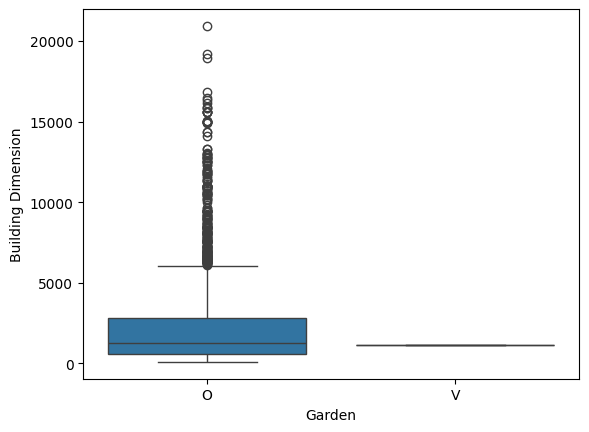

In [31]:
sns.boxplot(x='Garden', y = 'Building Dimension', data=rural_df)

In [32]:
garden_ana = rural_df.groupby('Garden')['Building Dimension'].sum()

garden_ana

,Building Dimension
Garden,
O,7837397.0
V,1150.0


In [33]:
rural_df['Garden'].value_counts()

,count
Garden,
O,3602
V,1


In [34]:
rural_df['Building_Fenced'].value_counts()

,count
Building_Fenced,
1,3608
0,2


In [35]:
rural_df['Garden'].fillna('O', inplace=True)

In [36]:
rural_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3610 entries, 1 to 7053
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3610 non-null   object 
 1   YearOfObservation   3610 non-null   int64  
 2   Insured_Period      3610 non-null   float64
 3   Residential         3610 non-null   int64  
 4   Building_Painted    3610 non-null   int64  
 5   Building_Fenced     3610 non-null   int64  
 6   Garden              3610 non-null   object 
 7   Settlement          3610 non-null   object 
 8   Building Dimension  3610 non-null   float64
 9   Building_Type       3610 non-null   int64  
 10  Date_of_Occupancy   3610 non-null   float64
 11  NumberOfWindows     3610 non-null   int8   
 12  Geo_Code            3610 non-null   object 
 13  Claim               3610 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 398.4+ KB


In [37]:
urban_df = df.loc[df['Settlement']=='U']
urban_df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,V,U,290.0,1,1960.0,0,1053,0
2,H3802,2014,1.0,0,1,0,V,U,595.0,1,1960.0,0,1053,0
3,H3834,2013,1.0,0,0,0,V,U,2840.0,1,1960.0,0,1053,0
6,H7390,2012,1.0,0,1,0,V,U,2830.0,1,1988.0,0,1143,0
7,H14488,2015,1.0,0,1,0,V,U,4952.0,1,1988.0,0,1160,0


In [38]:
urban_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3550 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3550 non-null   object 
 1   YearOfObservation   3550 non-null   int64  
 2   Insured_Period      3550 non-null   float64
 3   Residential         3550 non-null   int64  
 4   Building_Painted    3550 non-null   int64  
 5   Building_Fenced     3550 non-null   int64  
 6   Garden              3550 non-null   object 
 7   Settlement          3550 non-null   object 
 8   Building Dimension  3445 non-null   float64
 9   Building_Type       3550 non-null   int64  
 10  Date_of_Occupancy   3043 non-null   float64
 11  NumberOfWindows     3550 non-null   int8   
 12  Geo_Code            3448 non-null   object 
 13  Claim               3550 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 391.7+ KB


In [39]:
urban_df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,105
Building_Type,0


In [40]:
mean_building_urban = urban_df.groupby('Building_Type')['Building Dimension'].mean().round()

# Display the result
print(mean_building_urban)

Building_Type
1    1708.0
2    1591.0
3    1321.0
4    1596.0
Name: Building Dimension, dtype: float64


In [41]:
def fill_dimen(column):
  build_dim=column[0]
  build_type =column[1]

  if pd.isna(build_dim):
    if build_type == 1:
      return 1708.0
    if build_type == 2:
      return  1591.0
    if build_type == 3:
      return  1321.0
    if build_type == 4:
      return  1596.0

  else:
    return build_dim


In [42]:
urban_df['Building Dimension'] = urban_df[['Building Dimension', 'Building_Type']].apply(fill_dimen, axis=1)

In [43]:
urban_df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,0
Building_Type,0


In [44]:
urban_df['Date_of_Occupancy'].mode()

,Date_of_Occupancy
0,1960.0


In [45]:
urban_df['Date_of_Occupancy'].fillna(1960, inplace=True)

In [46]:
urban_df['Geo_Code'] = pd.to_numeric(urban_df['Geo_Code'], errors='coerce')

In [47]:
# Using apply to calculate mode for each group
mode_resident = urban_df.groupby('Residential')['Geo_Code'].apply(lambda x: x.mode())

# Display the result
print(mode_resident)


Residential   
0            0    21231.0
1            0    33063.0
Name: Geo_Code, dtype: float64


In [48]:
def fill_code(column):
  resident=column[0]
  code =column[1]

  if pd.isna(code):
    if resident == 0:
      return 21231.0
    if resident == 1:
      return 33063.0
  else:
    return code

In [49]:
urban_df['Geo_Code'] = urban_df[['Residential', 'Geo_Code']].apply(fill_code, axis = 1)

In [50]:
urban_df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,0
Building_Type,0


In [51]:
df = pd.concat([rural_df, urban_df], axis=0, ignore_index=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int64  
 5   Building_Fenced     7160 non-null   int64  
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   int8   
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 734.3+ KB


In [53]:
df['Garden']= np.where(df['Garden']=='V', 1, 0)

In [54]:
df['Geo_Code'] = pd.to_numeric(df['Geo_Code'], errors='coerce')

In [55]:
import matplotlib.pyplot as plt


<Axes: >

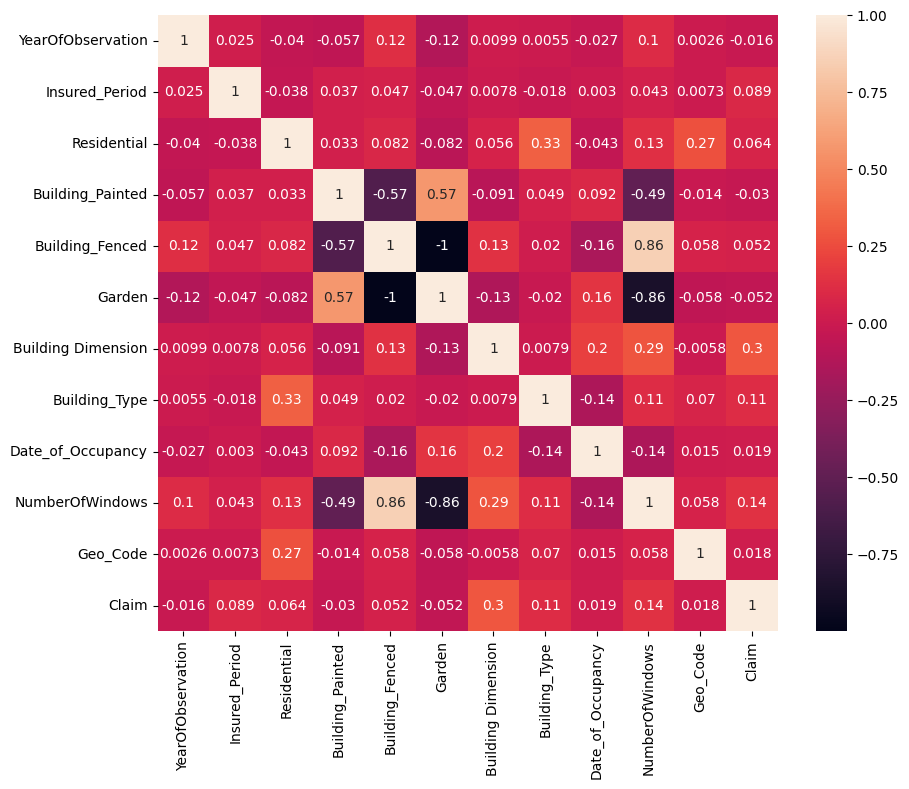

In [56]:
df_num = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True)

In [57]:
model_df = df.drop(['YearOfObservation', 'Date_of_Occupancy', 'Customer Id', 'Geo_Code'], axis=1)

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
col_to_encode = ['Settlement']

encoder = OneHotEncoder(drop='first', sparse=False)

encoded_data = encoder.fit_transform(df[['Settlement']])

col_name = encoder.get_feature_names_out(col_to_encode)

encode_df = pd.DataFrame(encoded_data, columns=col_name)

In [60]:
encode_df.head()

,Settlement_U
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [61]:
model_df = pd.concat([model_df, encode_df], axis=1)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [63]:
x = model_df.drop(['Claim','Settlement'], axis=1)
y = model_df['Claim']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [65]:
lr_model = LogisticRegression()

In [66]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      7160 non-null   float64
 1   Residential         7160 non-null   int64  
 2   Building_Painted    7160 non-null   int64  
 3   Building_Fenced     7160 non-null   int64  
 4   Garden              7160 non-null   int64  
 5   Building Dimension  7160 non-null   float64
 6   Building_Type       7160 non-null   int64  
 7   NumberOfWindows     7160 non-null   int8   
 8   Settlement_U        7160 non-null   float64
dtypes: float64(3), int64(5), int8(1)
memory usage: 454.6 KB


In [67]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_pred = lr_model.predict(x_test)

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1108
           1       0.63      0.16      0.26       324

    accuracy                           0.79      1432
   macro avg       0.72      0.57      0.57      1432
weighted avg       0.76      0.79      0.74      1432



In [71]:
from sklearn.metrics import roc_auc_score, roc_curve

In [72]:
y_pred_prob = lr_model.predict_proba(x_test)[:, 1]

In [73]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {auc_score:.2f}')

ROC AUC Score: 0.70


In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

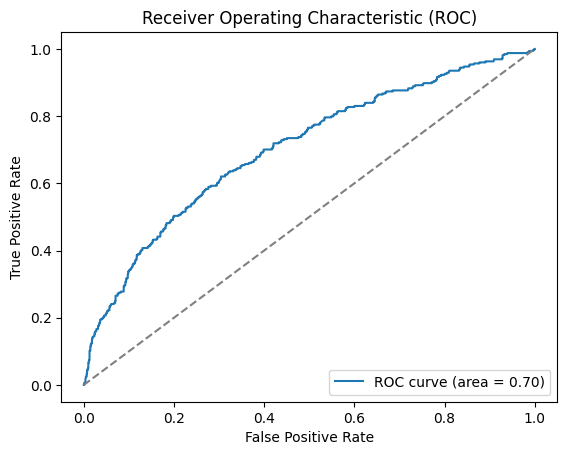

In [75]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

In [76]:
test = pd.read_csv('test_data.csv')

test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


**IMPOVEMENT**

In [78]:
test.drop(['Date_of_Occupancy', 'YearOfObservation', 'Geo_Code'], axis=1, inplace=True)

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   object 
 4   Building_Fenced     3069 non-null   object 
 5   Garden              3065 non-null   object 
 6   Settlement          3069 non-null   object 
 7   Building Dimension  3056 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   NumberOfWindows     3069 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 239.9+ KB


In [80]:
test.loc[test.isna().any(axis=1)]

,Customer Id,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows
1761,H1039,1.000000,0,V,N,NaN,R,155.0,2,1
2111,H12344,1.000000,0,V,N,NaN,R,1783.0,1,2
2112,H12345,1.000000,0,V,N,NaN,R,1783.0,1,2
2123,H9933,0.710383,0,V,N,NaN,R,3326.0,1,6
3056,H10502,1.000000,0,V,V,V,U,NaN,2,.
3057,H10716,1.000000,0,V,V,V,U,NaN,2,.
3058,H10718,0.863388,0,V,V,V,U,NaN,2,.
3059,H11182,1.000000,0,V,V,V,U,NaN,1,.
3060,H11333,0.339726,0,V,V,V,U,NaN,1,.
3061,H11416,1.000000,0,V,V,V,U,NaN,2,.
